Лабораторная работа по ИАД №1
Уменьшение объема данных

Статистические методы отбора признаков

Используемые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

Задание 1: Отбор признаков с использованием корреляционных матриц.
    
Для начала, используйте датасет о винах из sklearn.datasets. Найти
корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с
помощью seaborn.


--- Задача 1: Корреляционная матрица ---


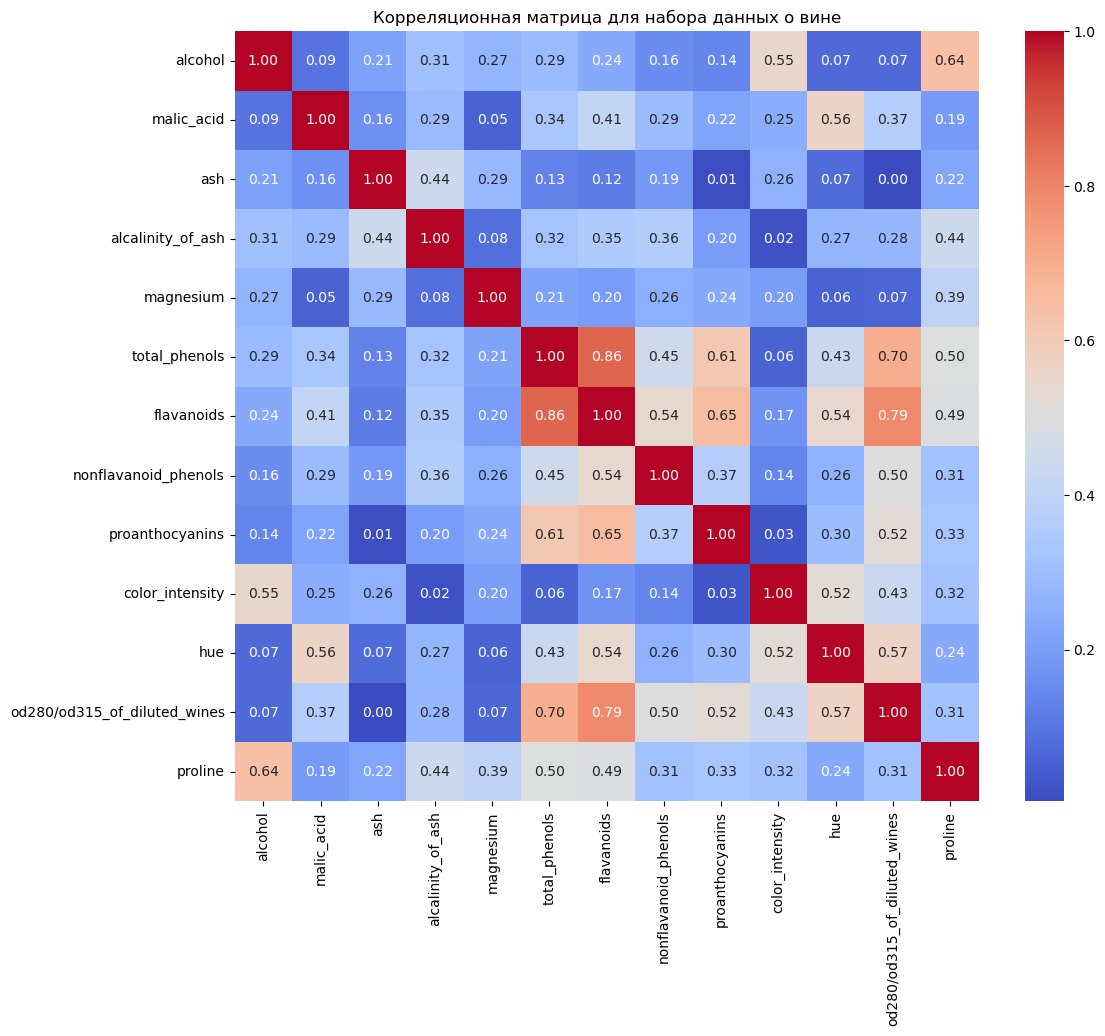

--- Выбранные признаки ---
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
MSE с выбранными признаками: 0.1943


In [93]:
wine = load_wine()
df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
print("\n--- Задача 1: Корреляционная матрица ---")
corr_matrix = df.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица для набора данных о вине")
plt.show()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

df_filtered = df.drop(to_drop, axis=1)
print("--- Выбранные признаки ---")
for name in list(df_filtered.columns):
    print(name)

X = df_filtered.values
y = wine['target']
feature_names = list(df_filtered.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE с выбранными признаками: {mse:.4f}")

Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
Используйте тот же датасет и подгоните модель RandomForestRegressor к
вашим данным, затем используйте атрибут feature_importances_ чтобы
определить наиболее важные признаки.


--- Задача 2: Важность признаков в случайном лесу ---


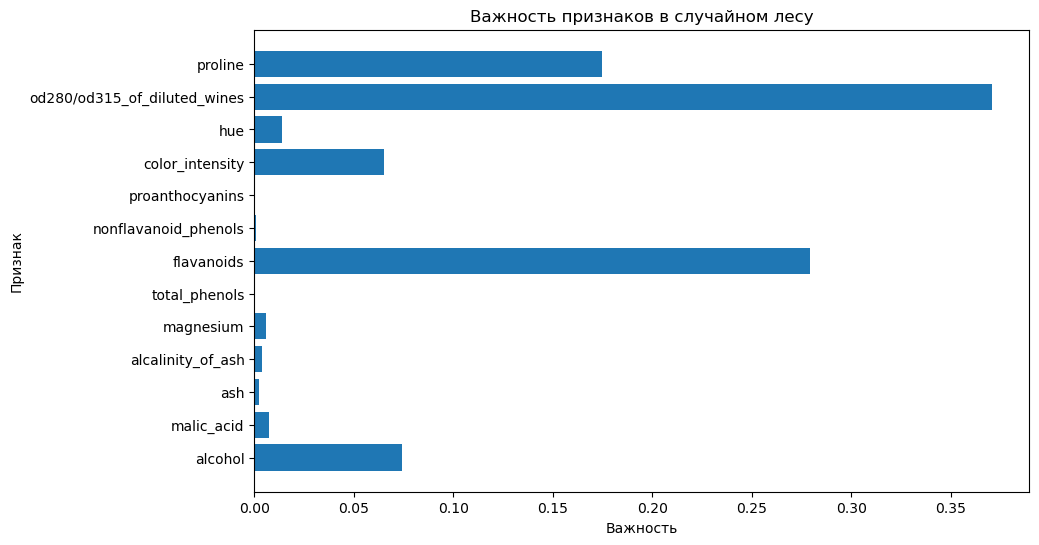


--- Выбранные признаки ---
alcohol
flavanoids
color_intensity
od280/od315_of_diluted_wines
proline
MSE с выбранными признаками: 0.0741


In [97]:
wine = load_wine()
X, y = wine['data'], wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = wine['feature_names']

print("\n--- Задача 2: Важность признаков в случайном лесу ---")
    # Опционально: визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Важность")
plt.ylabel("Признак")
plt.title("Важность признаков в случайном лесу")
plt.show()

selected_features = []
for i, mi in enumerate(feature_importances):
    if mi > 0.05:
        selected_features.append(feature_names[i])

print("\n--- Выбранные признаки ---")
for name in selected_features:
    print(name)

selected_feature_indices = [i for i, name in enumerate(feature_names) if name in selected_features]
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE с выбранными признаками: {mse:.4f}")

Задание 3: Использование выбора признаков на основе p-value.
Для этого задания можно использовать набор данных Boston Housing из
sklearn.datasets.

In [109]:
wine = load_wine()
X, y = wine['data'], wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

f_test, p_values = f_regression(X_train, y_train)

feature_names = wine['feature_names']

print("\n--- Задача 3: p-значения ---")
for name, p_val in zip(feature_names, p_values):
    print(f"{name}: {p_val:.4f}")

selected_features = []
for i, p_val in enumerate(p_values):
    if p_val < 0.001:
        selected_features.append(feature_names[i])

print("\n--- Выбранные признаки ---")
for name in selected_features:
    print(name)

selected_feature_indices = [i for i, name in enumerate(feature_names) if name in selected_features]
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE на выбранных признаках: {mse:.4f}")


--- Задача 3: p-значения ---
alcohol: 0.0002
malic_acid: 0.0000
ash: 0.6408
alcalinity_of_ash: 0.0000
magnesium: 0.0101
total_phenols: 0.0000
flavanoids: 0.0000
nonflavanoid_phenols: 0.0000
proanthocyanins: 0.0000
color_intensity: 0.0002
hue: 0.0000
od280/od315_of_diluted_wines: 0.0000
proline: 0.0000

--- Выбранные признаки ---
alcohol
malic_acid
alcalinity_of_ash
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
MSE на выбранных признаках: 0.0665


Задание 4: Отбор признаков с помощь метода взаимной информации.
Используйте любой датасет, с которым вам приятно работать. Установите
библиотеку sklearn и примените функцию mutual_info_classif или
mutual_info_regression для отбора признаков.

In [81]:
wine = load_wine()
X, y = wine['data'], wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mutual_info = mutual_info_classif(X_train, y_train, random_state=42)

feature_names = wine['feature_names']

print("\n--- Задача 4: Взаимная информация (Классификация) ---")
for name, mi in zip(feature_names, mutual_info):
        print(f"{name}: {mi:.4f}")

selected_features = []
for i, mi in enumerate(mutual_info):
    if mi > 0.5:
        selected_features.append(feature_names[i])

print("\n--- Выбранные признаки ---")
for name in selected_features:
    print(name)

selected_feature_indices = [i for i, name in enumerate(feature_names) if name in selected_features]
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE с выбранными признаками: {mse:.4f}")


--- Задача 4: Взаимная информация (Классификация) ---
alcohol: 0.4471
malic_acid: 0.2689
ash: 0.0919
alcalinity_of_ash: 0.2493
magnesium: 0.2291
total_phenols: 0.3886
flavanoids: 0.7015
nonflavanoid_phenols: 0.1349
proanthocyanins: 0.2568
color_intensity: 0.5721
hue: 0.5496
od280/od315_of_diluted_wines: 0.5221
proline: 0.5356

--- Выбранные признаки ---
Выбранные признаки:
flavanoids
color_intensity
hue
od280/od315_of_diluted_wines
proline
MSE с выбранными признаками: 0.0760


Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
Постройте модель, например, линейную регрессию или SVM, и используйте
RFE для выбора лучшего подмножества признаков.

In [39]:
wine = load_wine()
X, y = wine['data'], wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)

feature_names = wine['feature_names']

print("\n--- Задача 5: RFE (Линейная регрессия) ---")
for i in range(X.shape[1]):
    print(f"{feature_names[i]}: Выбран={rfe.support_[i]}, Ранг={rfe.ranking_[i]}")

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE с выбранными признаками: {mse:.4f}")


--- Задача 5: RFE (Линейная регрессия) ---
alcohol: Выбран=False, Ранг=3
malic_acid: Выбран=False, Ранг=5
ash: Выбран=False, Ранг=4
alcalinity_of_ash: Выбран=True, Ранг=1
magnesium: Выбран=False, Ранг=9
total_phenols: Выбран=False, Ранг=2
flavanoids: Выбран=True, Ранг=1
nonflavanoid_phenols: Выбран=False, Ранг=6
proanthocyanins: Выбран=False, Ранг=8
color_intensity: Выбран=True, Ранг=1
hue: Выбран=False, Ранг=7
od280/od315_of_diluted_wines: Выбран=True, Ранг=1
proline: Выбран=True, Ранг=1
MSE с выбранными признаками: 0.0704


Задание 6: Сравните различные методы отбора признаков.
Примените каждый из методов отбора признаков к одному и тому же датасету,
а затем сравните производительность моделей машинного обучения,
обученных на этих различных подмножествах признаков.

В ходе данной работы были получены результаты:
По метоту наименьших квадратов, наиболее точной методом отбора признаков является выбор признаков на основе p-value: MSE = 0.0665
Наименее точным получился метод отбора с помощью корелляционной матрицы: MSE = 0.1943
Остальные методы имеют примерно равную погрешность: MSE ~ 0.0710

Вывод
В ходе данной лабораторной работы были получены знания о методах отбора признаков, данные знания были применены и продемонстрированы на практике
с использованием функционала библиотек языка Python.